Rozwiązanie wielomodelowe


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy as sp

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ZTSI.csv')

Pierwszy model przewiduje wartosći z targetów Q, R i S

In [ ]:
labels_1 = df[["Q","R","S"]]#"Q","R","S","T"
labels_1

,Q,R,S
0,0.006,0.251,0.743
1,0.000,0.001,0.999
2,0.060,0.288,0.652
3,0.000,0.000,1.000
4,0.000,0.000,1.000
...,...,...,...
2994,0.017,0.148,0.835
2995,0.000,0.000,1.000
2996,0.000,0.000,1.000
2997,0.000,0.000,1.000


In [ ]:
features_1=df[["A", "B","C","D","E","F","P"]]
features_1

,A,B,C,D,E,F,P
0,7,37.281,22.982,27.478,0.535,1.007,0.0
1,4,44.585,24.704,37.649,0.488,1.301,0.0
2,6,44.580,28.450,28.923,0.774,0.908,0.0
3,5,45.122,18.719,41.147,1.280,1.378,0.0
4,3,34.953,19.789,25.372,0.917,0.605,0.0
...,...,...,...,...,...,...,...
2994,5,27.496,20.419,24.558,1.006,0.952,0.0
2995,4,36.921,16.461,29.046,0.410,1.226,0.0
2996,3,25.185,14.926,23.514,0.886,0.905,0.0
2997,3,41.186,22.007,32.554,0.702,1.344,0.0


In [ ]:
features_train_1, features_test_1, labels_train_1, labels_test_1 = train_test_split(
    features_1, labels_1, test_size=0.15, random_state=42
)

In [ ]:
means = np.mean(features_train_1, axis=0)
std_devs = np.std(features_train_1, axis=0)

features_train_s_m = (features_train_1 - means) / std_devs
features_test_s_m = (features_test_1 - means) / std_devs


#means_l = np.mean(labels_train_1, axis=0)
#std_devs_l = np.std(labels_train_1, axis=0)

#labels_train_s_m = (labels_train_1 - means_l) / std_devs_l
#labels_test_s_m = (labels_test_1 - means_l) / std_devs_l

In [ ]:
features_train_s_m["P"] = features_train_s_m['P'].fillna(0)
features_test_s_m["P"] = features_test_s_m['P'].fillna(0)

In [ ]:
features_train_s_m_t = torch.FloatTensor(features_train_s_m.to_numpy())
labels_train_s_m_t = torch.FloatTensor(labels_train_1.to_numpy())#labels_train_s_m
features_test_s_m_t = torch.FloatTensor(features_test_s_m.to_numpy())
labels_test_s_m_t = torch.FloatTensor(labels_test_1.to_numpy())#labels_test_s_m

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 7)
        self.fc3 = nn.Linear(7, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = NeuralNetwork()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
train_losses = []
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()

    outputs = model(features_train_s_m_t)
    loss = criterion(outputs, labels_train_s_m_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.detach().numpy())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.4294
Epoch [20/1000], Loss: 0.3868
Epoch [30/1000], Loss: 0.3506
Epoch [40/1000], Loss: 0.3183
Epoch [50/1000], Loss: 0.2882
Epoch [60/1000], Loss: 0.2582
Epoch [70/1000], Loss: 0.2279
Epoch [80/1000], Loss: 0.1972
Epoch [90/1000], Loss: 0.1676
Epoch [100/1000], Loss: 0.1404
Epoch [110/1000], Loss: 0.1168
Epoch [120/1000], Loss: 0.0973
Epoch [130/1000], Loss: 0.0822
Epoch [140/1000], Loss: 0.0710
Epoch [150/1000], Loss: 0.0631
Epoch [160/1000], Loss: 0.0574
Epoch [170/1000], Loss: 0.0531
Epoch [180/1000], Loss: 0.0498
Epoch [190/1000], Loss: 0.0471
Epoch [200/1000], Loss: 0.0448
Epoch [210/1000], Loss: 0.0430
Epoch [220/1000], Loss: 0.0414
Epoch [230/1000], Loss: 0.0401
Epoch [240/1000], Loss: 0.0389
Epoch [250/1000], Loss: 0.0378
Epoch [260/1000], Loss: 0.0368
Epoch [270/1000], Loss: 0.0359
Epoch [280/1000], Loss: 0.0350
Epoch [290/1000], Loss: 0.0341
Epoch [300/1000], Loss: 0.0332
Epoch [310/1000], Loss: 0.0324
Epoch [320/1000], Loss: 0.0316
Epoch [330/1000],

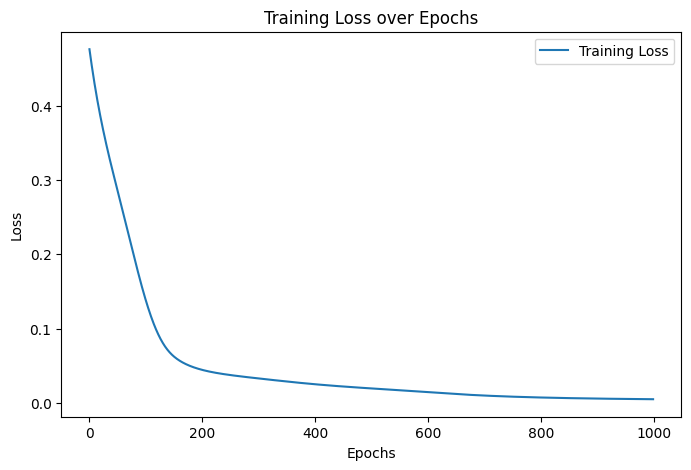

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(features_test_s_m_t)
    test_loss = criterion(test_outputs, labels_test_s_m_t)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0053


In [ ]:
X_test_np = features_test_s_m_t.numpy()
y_test_np = labels_test_s_m_t.numpy()
predicted_np = test_outputs.numpy()

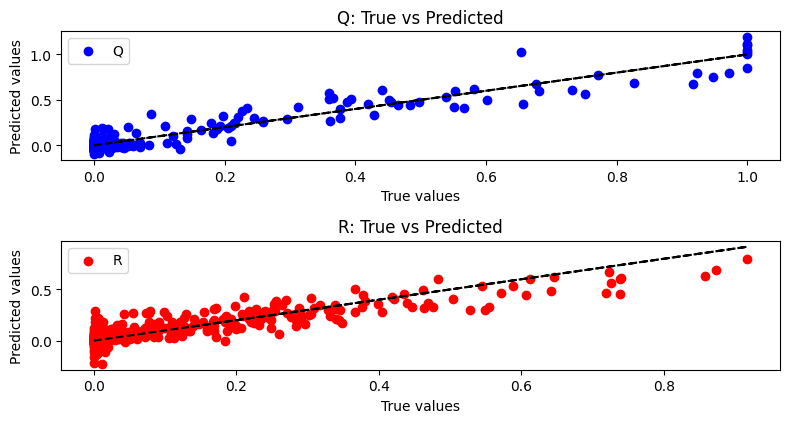

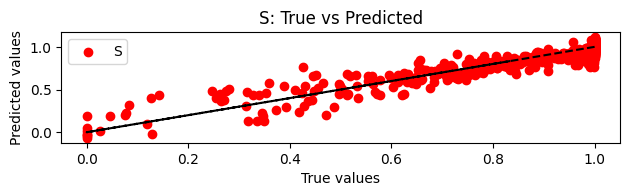

In [ ]:
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plt.scatter(y_test_np[:, 0], predicted_np[:, 0], color='blue', label='Q')
plt.plot(y_test_np[:, 0], y_test_np[:, 0], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Q: True vs Predicted')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(y_test_np[:, 1], predicted_np[:, 1], color='red', label='R')
plt.plot(y_test_np[:, 1], y_test_np[:, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('R: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(3, 1, 3)
plt.scatter(y_test_np[:, 2], predicted_np[:, 2], color='red', label='S')
plt.plot(y_test_np[:, 2], y_test_np[:, 2], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('S: True vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    predicted = model(features_test_s_m_t)


    r_squared_values = [r2_score(labels_test_s_m_t[:, i].numpy(), predicted[:, i].numpy()) for i in range(3)]

    print(r_squared_values)
    average_r_squared = np.mean(r_squared_values)

    print(f"R-squared: {average_r_squared}")

[0.9477046040469442, 0.861374981295497, 0.9262741514271244]
R-squared: 0.9117845789231885


In [ ]:
prediction_data = [{'A': 7, 'B': 38.624, 'C': 24.35, 'D': 29.624, 'E': 0.624, 'F': 1.143, 'P': 0}]
df_predictions = pd.DataFrame(prediction_data)
df_predictions

,A,B,C,D,E,F,P
0,7,38.624,24.35,29.624,0.624,1.143,0


In [ ]:
columns =["Q", "R", "S"]

In [ ]:
new_data_standardized = (df_predictions - means) / std_devs

In [ ]:
new_data_standardized["P"] = new_data_standardized["P"].fillna(0)

In [ ]:
new_features_tensor = torch.FloatTensor(new_data_standardized.to_numpy())

In [ ]:
model.eval()
with torch.no_grad():
    new_predictions = model(new_features_tensor)
print(new_predictions)

pred = pd.DataFrame(new_predictions, columns=columns)

predicted_original_scale = (pred * std_devs_l) + means_l
print(predicted_original_scale)

tensor([[-0.3698,  1.6093, -0.7487]])
          Q         R        S
0 -0.001683  0.374458  0.63979


Model do przewidywania T

In [ ]:
labels_2 = df[["T"]]#"Q","R","S","T"
labels_2

,T
0,4190.292
1,6014.482
2,4200.343
3,19121.405
4,1978.472
...,...
2994,6489.224
2995,2450.382
2996,2723.639
2997,3792.123


In [ ]:
features_2=df[["A", "B","C","D","E","F","P","Q","R","S"]]
features_2

,A,B,C,D,E,F,P,Q,R,S
0,7,37.281,22.982,27.478,0.535,1.007,0.0,0.006,0.251,0.743
1,4,44.585,24.704,37.649,0.488,1.301,0.0,0.000,0.001,0.999
2,6,44.580,28.450,28.923,0.774,0.908,0.0,0.060,0.288,0.652
3,5,45.122,18.719,41.147,1.280,1.378,0.0,0.000,0.000,1.000
4,3,34.953,19.789,25.372,0.917,0.605,0.0,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...
2994,5,27.496,20.419,24.558,1.006,0.952,0.0,0.017,0.148,0.835
2995,4,36.921,16.461,29.046,0.410,1.226,0.0,0.000,0.000,1.000
2996,3,25.185,14.926,23.514,0.886,0.905,0.0,0.000,0.000,1.000
2997,3,41.186,22.007,32.554,0.702,1.344,0.0,0.000,0.000,1.000


In [ ]:
features_train_2, features_test_2, labels_train_2, labels_test_2 = train_test_split(
    features_2, labels_2, test_size=0.15, random_state=42
)

In [ ]:
means = np.mean(features_train_2, axis=0)
std_devs = np.std(features_train_2, axis=0)

features_train_s_m = (features_train_2 - means) / std_devs
features_test_s_m = (features_test_2 - means) / std_devs


means_l = np.mean(labels_train_2, axis=0)
std_devs_l = np.std(labels_train_2, axis=0)

labels_train_s_m = (labels_train_2 - means_l) / std_devs_l
labels_test_s_m = (labels_test_2 - means_l) / std_devs_l

In [ ]:
features_train_s_m["P"] = features_train_s_m['P'].fillna(0)
features_test_s_m["P"] = features_test_s_m['P'].fillna(0)

In [ ]:
features_train_s_m_t = torch.FloatTensor(features_train_s_m.to_numpy())
labels_train_s_m_t = torch.FloatTensor(labels_train_s_m.to_numpy())#labels_train_s_m
features_test_s_m_t = torch.FloatTensor(features_test_s_m.to_numpy())
labels_test_s_m_t = torch.FloatTensor(labels_test_s_m.to_numpy())#labels_test_s_m

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(7, 24)
        self.fc2 = nn.Linear(24, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = NeuralNetwork()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)

In [ ]:
train_losses = []
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()

    outputs = model(features_train_s_m_t)
    loss = criterion(outputs, labels_train_s_m_t)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.detach().numpy())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.8775
Epoch [20/1000], Loss: 0.7856
Epoch [30/1000], Loss: 0.6884
Epoch [40/1000], Loss: 0.5793
Epoch [50/1000], Loss: 0.4707
Epoch [60/1000], Loss: 0.3806
Epoch [70/1000], Loss: 0.3157
Epoch [80/1000], Loss: 0.2628
Epoch [90/1000], Loss: 0.2212
Epoch [100/1000], Loss: 0.1902
Epoch [110/1000], Loss: 0.1687
Epoch [120/1000], Loss: 0.1461
Epoch [130/1000], Loss: 0.1221
Epoch [140/1000], Loss: 0.1035
Epoch [150/1000], Loss: 0.0880
Epoch [160/1000], Loss: 0.0761
Epoch [170/1000], Loss: 0.0676
Epoch [180/1000], Loss: 0.0622
Epoch [190/1000], Loss: 0.0552
Epoch [200/1000], Loss: 0.0497
Epoch [210/1000], Loss: 0.0443
Epoch [220/1000], Loss: 0.0400
Epoch [230/1000], Loss: 0.0365
Epoch [240/1000], Loss: 0.0338
Epoch [250/1000], Loss: 0.0313
Epoch [260/1000], Loss: 0.0299
Epoch [270/1000], Loss: 0.0274
Epoch [280/1000], Loss: 0.0266
Epoch [290/1000], Loss: 0.0247
Epoch [300/1000], Loss: 0.0230
Epoch [310/1000], Loss: 0.0218
Epoch [320/1000], Loss: 0.0212
Epoch [330/1000],

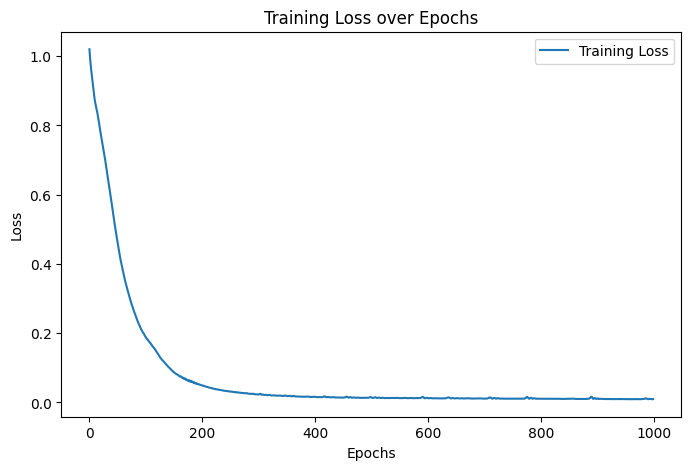

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(features_test_s_m_t)
    test_loss = criterion(test_outputs, labels_test_s_m_t)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 1.2565


In [ ]:
X_test_np = features_test_s_m_t.numpy()
y_test_np = labels_test_s_m_t.numpy()
predicted_np = test_outputs.numpy()

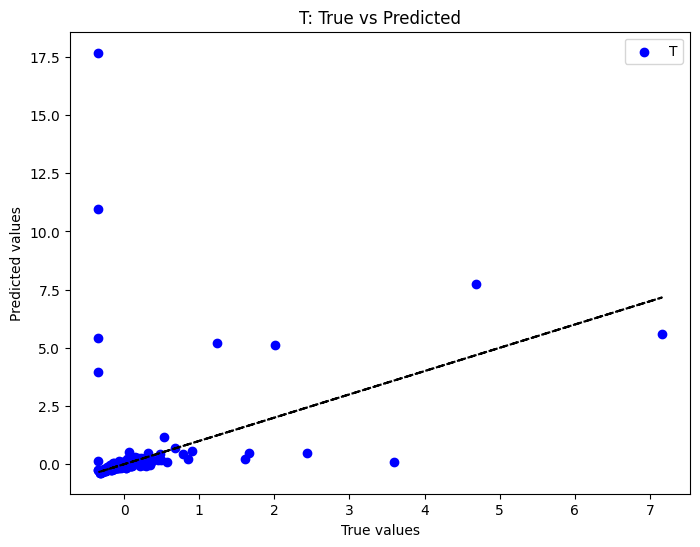

In [ ]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 1, 1)
plt.scatter(y_test_np[:, 0], predicted_np[:, 0], color='blue', label='T')
plt.plot(y_test_np[:, 0], y_test_np[:, 0], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('T: True vs Predicted')
plt.legend()



In [ ]:
model.eval()
with torch.no_grad():
    predicted = model(features_test_s_m_t)


    r_squared_values = [r2_score(labels_test_s_m_t[:, i].numpy(), predicted[:, i].numpy()) for i in range(1)]

    print(r_squared_values)
    average_r_squared = np.mean(r_squared_values)

    print(f"R-squared: {average_r_squared}")

[-3.658162923695233]
R-squared: -3.658162923695233


In [ ]:
prediction_data = [{'A': 7, 'B': 38.624, 'C': 24.35, 'D': 29.624, 'E': 0.624, 'F': 1.143, 'P': 0}]
df_predictions = pd.DataFrame(prediction_data)
df_predictions

In [ ]:
columns =["T"]

In [ ]:
new_data_standardized = (df_predictions - means) / std_devs

In [ ]:
new_data_standardized["P"] = new_data_standardized["P"].fillna(0)

In [ ]:
new_features_tensor = torch.FloatTensor(new_data_standardized.to_numpy())

In [ ]:
model.eval()
with torch.no_grad():
    new_predictions = model(new_features_tensor)
print(new_predictions)

pred = pd.DataFrame(new_predictions, columns=columns)

predicted_original_scale = (pred * std_devs_l) + means_l
print(predicted_original_scale)